In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from tqdm import tqdm
from keras.models import Model, Sequential
from keras.layers import Input, Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.utils import layer_utils
from keras import backend as K
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, TensorBoard, CSVLogger
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, accuracy_score
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.resnet50 import ResNet50
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing.image import ImageDataGenerator
from sklearn.linear_model import LogisticRegression

Using TensorFlow backend.


In [2]:
def read_img(img_id, train_or_test, size):
    """Read and resize image.
    # Arguments
        img_id: string
        train_or_test: string 'train' or 'test'.
        size: resize the original image.
    # Returns
        Image as numpy array.
    """
    img = image.load_img(join(data_dir, train_or_test, '%s.jpg' % img_id), target_size=size)
    img = image.img_to_array(img)
    return img

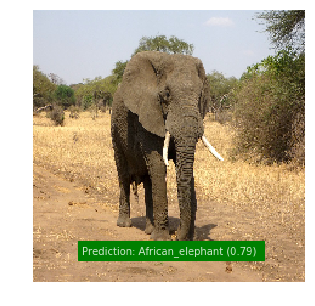

In [9]:
resnet = ResNet50(weights='imagenet')
img = image.load_img('elephant.jpg', target_size=(224, 224))
img = image.img_to_array(img)
x = preprocess_input(np.expand_dims(img.copy(), axis=0))
pred = resnet.predict(x)
_, imagenet_class_name, prob = decode_predictions(pred, top=1)[0][0]
fig, ax = plt.subplots(figsize=(5,5))
ax.imshow(img / 255.)
ax.text(40, 200, 'Prediction: %s (%.2f) ' % (imagenet_class_name , prob), color='w', backgroundcolor='g', alpha=0.8)
ax.axis('off')
plt.show()